In [163]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
%matplotlib inline

## 10.1 1d Self-Organizing Map for 2d data

In [46]:
data = np.hstack((np.random.uniform(0, 1, (1000,1)), np.random.uniform(0, 2, (1000,1))))

In [47]:
data[0]

array([ 0.67560063,  1.75624854])

In [145]:
def make_prototypes(data, K):
    data_mean = np.mean(data, axis=0)

    pca = PCA()
    pcs = pca.fit_transform(data)
    
    prototypes = np.zeros((K, 2))
    for k in range(K):
        weighted_pcs = (np.random.rand(data.shape[1])-0.5) * pcs[0] + (np.random.rand(data.shape[1])-0.5) * pcs[1]
        prototypes[k] = data_mean + weighted_pcs
        
    return prototypes

In [158]:
ps = make_prototypes(data, 4)

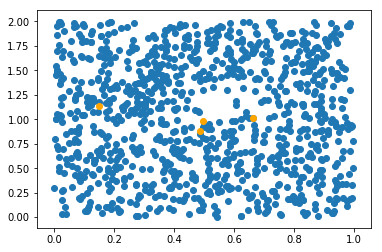

In [159]:
plt.scatter(data[:,0], data[:,1])
plt.scatter(ps[:, 0], ps[:, 1], color='orange')

In [166]:
def kohonen_map(data, M, eps, sigma):
    ps = make_prototypes(data, M)
    while True:
        i = np.random.choice(range(data.shape[0]))
        x = data[i]
        
        dists = cdist(data[i, np.newaxis], ps)
        q = ps[np.argmin(dists)]
        
        
        print(dists)
        break

In [167]:
kohonen_map(data, 4, 5, 1)

[[ 1.12627748  0.88136041  1.25189181  1.13390141]]
